In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('D:\Projects\DATA_ANALYST_PROJECTS\A_B Testing – Website Conversion Rate Optimization\data/ab_cleaned_data.csv',parse_dates=['timestamp'])

In [7]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       290585 non-null  int64         
 1   timestamp     290585 non-null  datetime64[ns]
 2   group         290585 non-null  object        
 3   landing_page  290585 non-null  object        
 4   converted     290585 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.1+ MB


In [4]:
df['converted'].value_counts()

0    255832
1     34753
Name: converted, dtype: int64

In [5]:
overall_conv=df['converted'].mean()
print(f'Overall Conversion Rate : {overall_conv:.2%}')

Overall Conversion Rate : 11.96%


In [12]:
group_rates=df.groupby('group')['converted'].mean().reset_index()

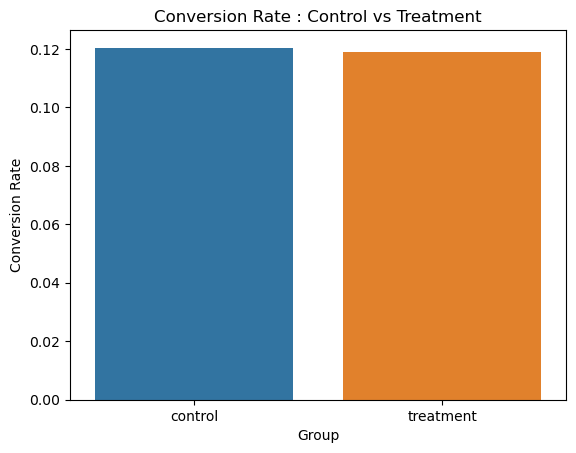

In [14]:
sns.barplot(data=group_rates,x='group',y='converted')
plt.title('Conversion Rate : Control vs Treatment')
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.show()

In [15]:
df['date']=df['timestamp'].dt.date

In [16]:
daily=df.groupby(['date','group'])['converted'].mean().reset_index()

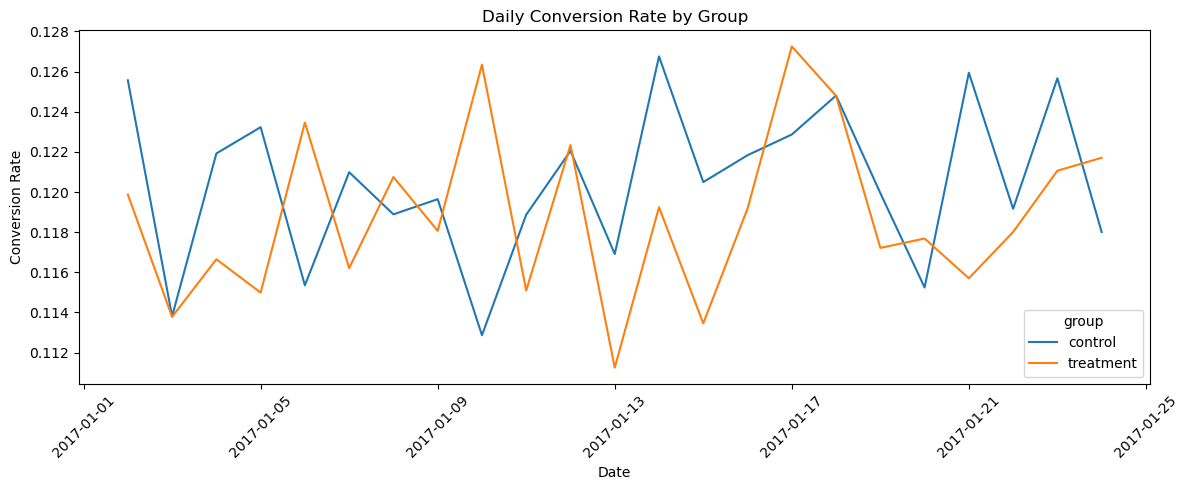

In [19]:
plt.figure(figsize=(12,5))
sns.lineplot(data=daily,x='date',y='converted',hue='group')
plt.title('Daily Conversion Rate by Group')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

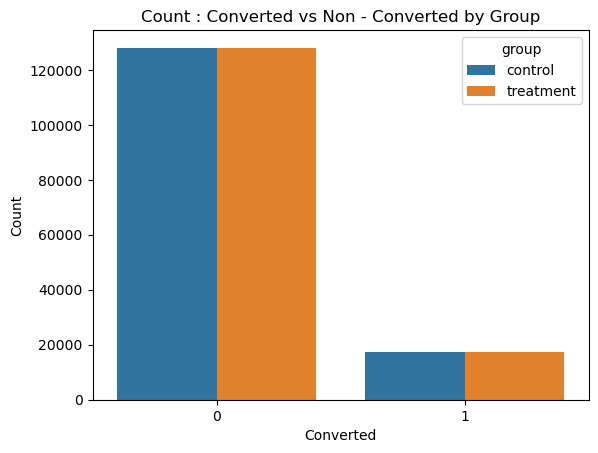

In [21]:
sns.countplot(data=df,x='converted',hue='group')
plt.title('Count : Converted vs Non - Converted by Group')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.show()

In [27]:
counts=df['group'].value_counts().reset_index()

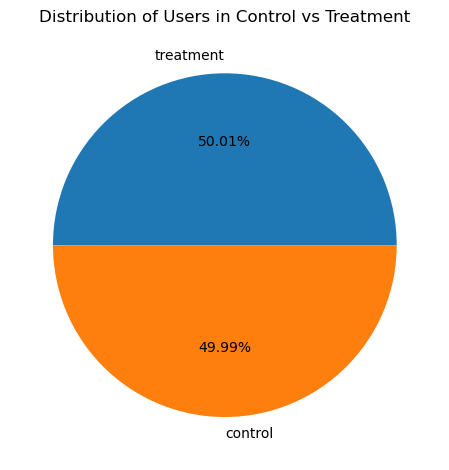

In [34]:
plt.pie(x=counts['group'],labels=counts['index'],autopct="%.2f%%")
plt.title('Distribution of Users in Control vs Treatment')
plt.tight_layout()
plt.show()

Null Hypothesis (H₀): The conversion rates for control and treatment groups are equal.

Alternative Hypothesis (H₁): The conversion rates for control and treatment groups are different.

In [35]:
control=df[df['group']=='control']
treatment=df[df['group']=='treatment']

In [36]:
n_control=control.shape[0]
n_treatment=treatment.shape[0]

conv_control=control['converted'].sum()
conv_treatment=treatment['converted'].sum()

In [37]:
print(f"Control: {conv_control}/{n_control} conversions")
print(f"Treatment: {conv_treatment}/{n_treatment} conversions")

Control: 17489/145274 conversions
Treatment: 17264/145311 conversions


## Perform Two Proportion Z test

In [42]:
from statsmodels.stats.proportion import proportions_ztest

In [43]:
# Counts and Sample sizes
counts=[conv_treatment,conv_control]
nobs=[n_treatment,n_control]

stats,pval=proportions_ztest(count=counts,nobs=nobs,alternative='two-sided')

print(f'Z-Statistics:{stats:0.4f}')
print(f'P-value:{pval:0.4f}')

Z-Statistics:-1.3116
P-value:0.1897


Interpret Results

If p-value < 0.05, we reject H₀ and conclude there is a significant difference in conversion rates.

If p-value ≥ 0.05, we fail to reject H₀ and conclude there is no significant difference.